<a href="https://colab.research.google.com/github/nhutd107/CNN_BT_AI/blob/main/NhanDienCacThanhVienTrongLop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
folder = '/content/drive/MyDrive/ThuMuc_DuLieuDeTrain/AE_Trong_Lop/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('T_NAM'):
    output= 1.0
  if file.startswith('NHU'):
    output= 2.0
  if file.startswith('HIEU'):
    output= 3.0
  if file.startswith('DONG'):
    output= 4.0
  if file.startswith('PHI'):
    output= 5.0
  photo = load_img(folder + file, target_size= (40,40))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

In [6]:
photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/ThuMuc_ChuyenAnhVeMangNumpy/Data_aetronglop/AE_lop_photos.npy', photos)
save('/content/drive/MyDrive/Colab Notebooks/ThuMuc_ChuyenAnhVeMangNumpy/Data_aetronglop/AE_lop_labels.npy', labels)

(301, 40, 40, 3) (301,)


In [7]:
# Split data into train & test
split_index = int(0.05 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [8]:
print(test_x.shape, train_x.shape)

(15, 40, 40, 3) (286, 40, 40, 3)


In [9]:
train_x = train_x.reshape((286, 40, 40, 3))
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((15, 40, 40, 3))
test_x = test_x.astype('float32')/255
     

In [10]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,6)
test_y = to_categorical(test_y,6)

In [11]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 64
epochs = 40
classes = 6

In [12]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (40, 40, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [13]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()
     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 40, 40, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                        

In [14]:
#Compile:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)

Epoch 1/40
5/5 [==============================] - 20s 4s/step - loss: 1.7921 - accuracy: 0.2692
Epoch 2/40
5/5 [==============================] - 17s 3s/step - loss: 1.6779 - accuracy: 0.1993
Epoch 3/40
5/5 [==============================] - 19s 4s/step - loss: 1.5376 - accuracy: 0.3916
Epoch 4/40
5/5 [==============================] - 18s 4s/step - loss: 0.9388 - accuracy: 0.6643
Epoch 5/40
5/5 [==============================] - 19s 4s/step - loss: 0.4292 - accuracy: 0.8986
Epoch 6/40
5/5 [==============================] - 18s 4s/step - loss: 1.5971 - accuracy: 0.7378
Epoch 7/40
5/5 [==============================] - 18s 3s/step - loss: 0.3271 - accuracy: 0.9371
Epoch 8/40
5/5 [==============================] - 18s 3s/step - loss: 0.0949 - accuracy: 0.9825
Epoch 9/40
5/5 [==============================] - 18s 4s/step - loss: 0.0395 - accuracy: 0.9895
Epoch 10/40
5/5 [==============================] - 20s 4s/step - loss: 0.0225 - accuracy: 0.9965
Epoch 11/40
5/5 [======================

In [15]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)
     

1/1 [==============================] - 0s 265ms/step - loss: 2.4112e-05 - accuracy: 1.0000
Test accuracy: 1.0


In [16]:
model.save('/content/drive/MyDrive/Colab Notebooks/ThuMuc_ChuyenAnhVeMangNumpy/Data_aetronglop/model_ae.h5')

1/1 [==============================] - 0s 40ms/step
DONG


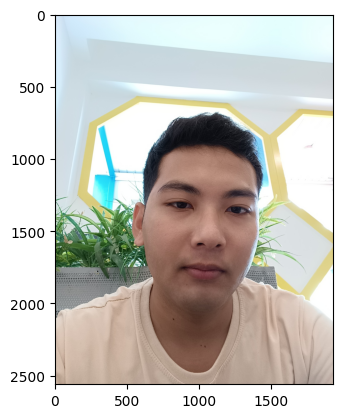

1/1 [==============================] - 0s 29ms/step
DONG


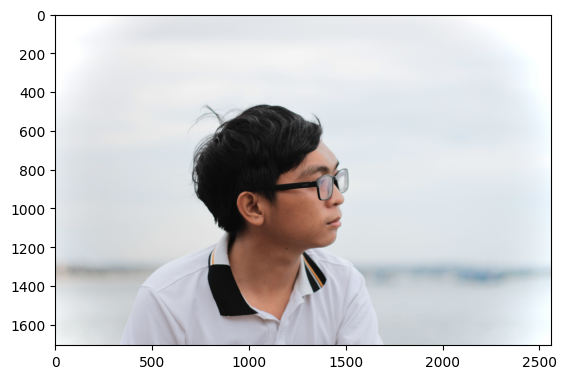

1/1 [==============================] - 0s 40ms/step
T_NAM


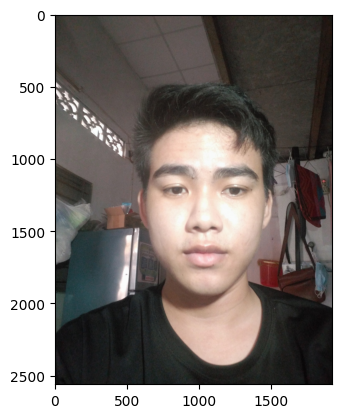

1/1 [==============================] - 0s 102ms/step
HIEU


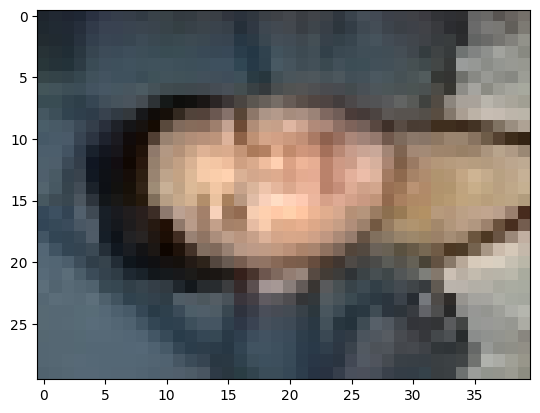

1/1 [==============================] - 0s 29ms/step
DONG


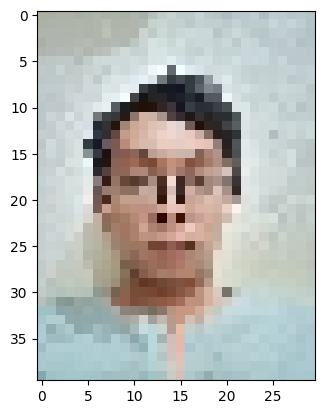

1/1 [==============================] - 0s 26ms/step
NHU


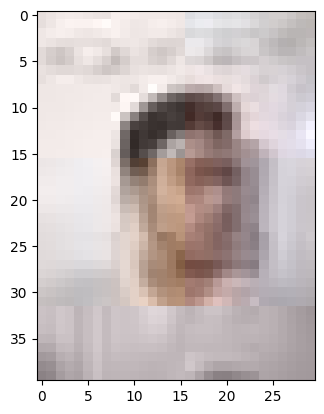

1/1 [==============================] - 0s 33ms/step
T_NAM


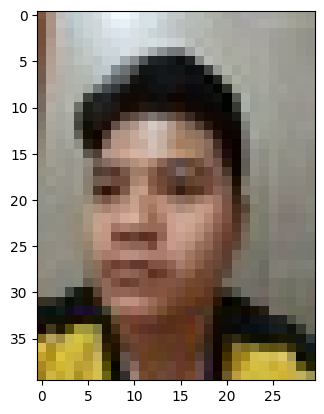

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/ThuMuc_test/Test_AETrongLop/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (40, 40))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['','T_NAM', 'NHU', 'HIEU', 'DONG', 'PHI']
  print(class_name[result])
  plt.show()